<a href="https://colab.research.google.com/github/JoDeMiro/TimeSeriesLearn/blob/main/21_TSLearn_Matrix_Profile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline


# Matrix Profile

This example presents a toy example of using Matrix Profile [1] for anomaly 
detection.

Matrix Profile transforms a time series into a sequence of 1-Nearest-Neighbor 
distances between its subseries.

[1] C. M. Yeh, Y. Zhu, L. Ulanova, N.Begum et al. 
Matrix Profile I: All Pairs Similarity Joins for Time Series: A 
Unifying View that Includes Motifs, Discords and Shapelets.
ICDM 2016.


In [1]:
!pip install -q tslearn

     |████████████████████████████████| 793 kB 5.1 MB/s 


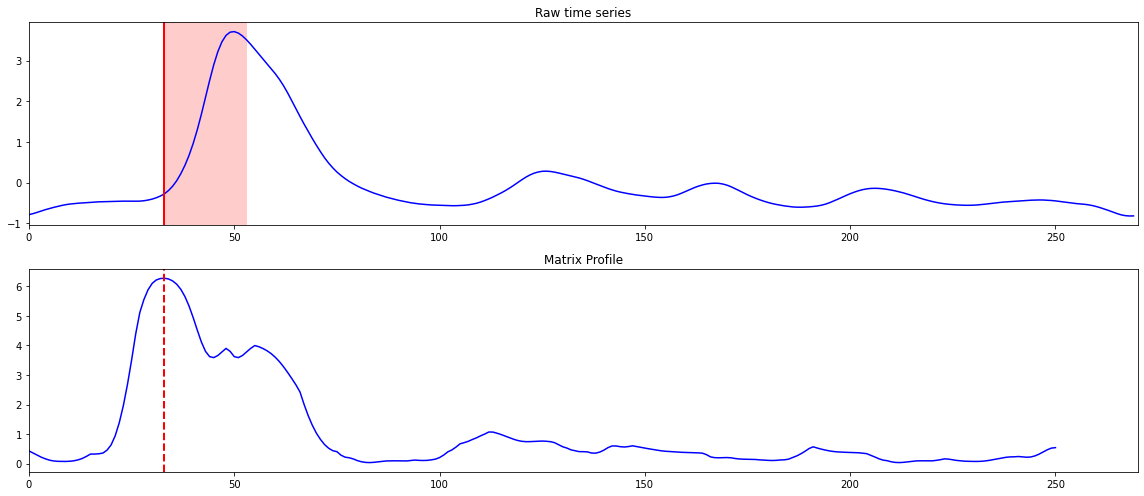

In [3]:
# Author: Romain Tavenard
# License: BSD 3 clause

import numpy
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms

from tslearn.matrix_profile import MatrixProfile

s_x = numpy.array(
    [-0.790, -0.765, -0.734, -0.700, -0.668, -0.639, -0.612, -0.587, -0.564,
     -0.544, -0.529, -0.518, -0.509, -0.502, -0.494, -0.488, -0.482, -0.475,
     -0.472, -0.470, -0.465, -0.464, -0.461, -0.458, -0.459, -0.460, -0.459,
     -0.458, -0.448, -0.431, -0.408, -0.375, -0.333, -0.277, -0.196, -0.090,
     0.047, 0.220, 0.426, 0.671, 0.962, 1.300, 1.683, 2.096, 2.510, 2.895,
     3.219, 3.463, 3.621, 3.700, 3.713, 3.677, 3.606, 3.510, 3.400, 3.280,
     3.158, 3.038, 2.919, 2.801, 2.676, 2.538, 2.382, 2.206, 2.016, 1.821,
     1.627, 1.439, 1.260, 1.085, 0.917, 0.758, 0.608, 0.476, 0.361, 0.259,
     0.173, 0.096, 0.027, -0.032, -0.087, -0.137, -0.179, -0.221, -0.260,
     -0.293, -0.328, -0.359, -0.385, -0.413, -0.437, -0.458, -0.480, -0.498,
     -0.512, -0.526, -0.536, -0.544, -0.552, -0.556, -0.561, -0.565, -0.568,
     -0.570, -0.570, -0.566, -0.560, -0.549, -0.532, -0.510, -0.480, -0.443,
     -0.402, -0.357, -0.308, -0.256, -0.200, -0.139, -0.073, -0.003, 0.066,
     0.131, 0.186, 0.229, 0.259, 0.276, 0.280, 0.272, 0.256, 0.234, 0.209,
     0.186, 0.162, 0.139, 0.112, 0.081, 0.046, 0.008, -0.032, -0.071, -0.110,
     -0.147, -0.180, -0.210, -0.235, -0.256, -0.275, -0.292, -0.307, -0.320,
     -0.332, -0.344, -0.355, -0.363, -0.367, -0.364, -0.351, -0.330, -0.299,
     -0.260, -0.217, -0.172, -0.128, -0.091, -0.060, -0.036, -0.022, -0.016,
     -0.020, -0.037, -0.065, -0.104, -0.151, -0.201, -0.253, -0.302, -0.347,
     -0.388, -0.426, -0.460, -0.491, -0.517, -0.539, -0.558, -0.575, -0.588,
     -0.600, -0.606, -0.607, -0.604, -0.598, -0.589, -0.577, -0.558, -0.531,
     -0.496, -0.454, -0.410, -0.364, -0.318, -0.276, -0.237, -0.203, -0.176,
     -0.157, -0.145, -0.142, -0.145, -0.154, -0.168, -0.185, -0.206, -0.230,
     -0.256, -0.286, -0.318, -0.351, -0.383, -0.414, -0.442, -0.467, -0.489,
     -0.508, -0.523, -0.535, -0.544, -0.552, -0.557, -0.560, -0.560, -0.557,
     -0.551, -0.542, -0.531, -0.519, -0.507, -0.494, -0.484, -0.476, -0.469,
     -0.463, -0.456, -0.449, -0.442, -0.435, -0.431, -0.429, -0.430, -0.435,
     -0.442, -0.452, -0.465, -0.479, -0.493, -0.506, -0.517, -0.526, -0.535,
     -0.548, -0.567, -0.592, -0.622, -0.655, -0.690, -0.728, -0.764, -0.795,
     -0.815, -0.823, -0.821]).reshape((-1, 1))

mp = MatrixProfile(subsequence_length=20, scale=False)
mp_series = mp.fit_transform([s_x])[0]
t_star = numpy.argmax(mp_series.ravel())

plt.figure(figsize=(16, 7))
ax = plt.subplot(2, 1, 1)  # First, raw time series
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
plt.plot(s_x.ravel(), "b-")
plt.xlim([0, s_x.shape[0]])
plt.axvline(x=t_star,  c="red", linewidth=2)
plt.fill_between(x=[t_star, t_star+mp.subsequence_length], y1=0., y2=1.,
                 facecolor="r", alpha=.2, transform=trans)
plt.title("Raw time series")

plt.subplot(2, 1, 2)  # Second, Matrix Profile
plt.plot(mp_series.ravel(), "b-")
plt.axvline(x=t_star,  c="red", linewidth=2, linestyle="dashed")
plt.xlim([0, s_x.shape[0]])
plt.title("Matrix Profile")

plt.tight_layout()
plt.show()

# Ááá

In [4]:
print('s_x.shape = ', s_x.shape)

s_x.shape =  (270, 1)


In [30]:
import numpy as np

_x = np.arange(0, 270, 1)
_y = np.sin(_x/180*20) + _x*0.02
_y = np.sin(_x/180*20) + _x*0.02 + np.sin(_x/20)
# _y = np.sin(_x/180*20)

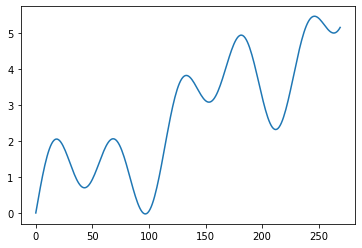

In [31]:
plt.plot(_x, _y)
plt.show()

In [35]:
print('_y.shape = ', _y.shape)

_y = _y.reshape((-1, 1))

print('_y.shape = ', _y.shape)

_y.shape =  (270, 1)


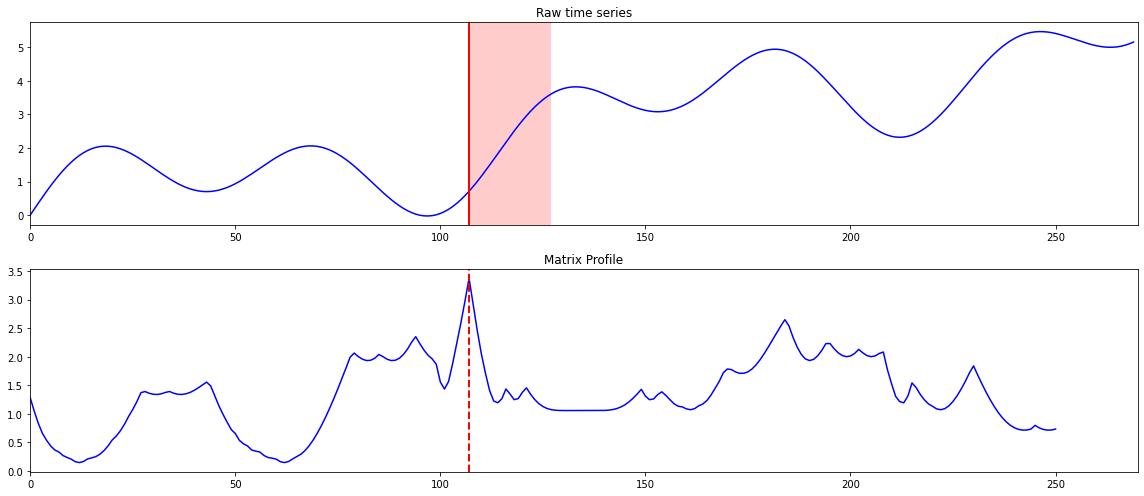

In [34]:
# Author: Romain Tavenard
# License: BSD 3 clause

import numpy
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms

from tslearn.matrix_profile import MatrixProfile

s_x = _y.copy()

mp = MatrixProfile(subsequence_length=20, scale=False)
mp_series = mp.fit_transform([s_x])[0]
t_star = numpy.argmax(mp_series.ravel())

plt.figure(figsize=(16, 7))
ax = plt.subplot(2, 1, 1)  # First, raw time series
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
plt.plot(s_x.ravel(), "b-")
plt.xlim([0, s_x.shape[0]])
plt.axvline(x=t_star,  c="red", linewidth=2)
plt.fill_between(x=[t_star, t_star+mp.subsequence_length], y1=0., y2=1.,
                 facecolor="r", alpha=.2, transform=trans)
plt.title("Raw time series")

plt.subplot(2, 1, 2)  # Second, Matrix Profile
plt.plot(mp_series.ravel(), "b-")
plt.axvline(x=t_star,  c="red", linewidth=2, linestyle="dashed")
plt.xlim([0, s_x.shape[0]])
plt.title("Matrix Profile")

plt.tight_layout()
plt.show()